In [7]:
using DifferentialEquations, ParameterizedFunctions, CairoMakie

vdp = @ode_def begin
    dx = (x - x^3/3 + y)
    dy = ϵ*(a-x)
end ϵ a

function vdpplot(u0,tspan,p)
    prob = ODEProblem(vdp, u0, tspan, p)
    sol = solve(prob,abstol=1e-12,reltol=1e-12)
    
    fig = Figure()
    ax = Axis(fig[1,1])
    
    lines!(ax, -2.5:.01:2.5, x->-x+x^3/3,label="x' = 0", color=:red)
    lines!(ax, ones(length(-1:.1:1))*p[2],-1:.1:1,  label="y' = 0", color=:green)
    lines!(ax,sol[1,:],sol[2,:],color=:blue)
    ylims!(-1,1)
    axislegend()

    fig,sol
end

canard_a = .99874045124555;

# Topics in multiscale dynamics, with applications - Day 1

### Preliminaries

## I. Linear ODEs

* The simplest nontrivial ODE is $$\dot{x} = Ax $$ where $x \in \mathbb{R}^n$ where $A: \mathbb{R}^n \to \mathbb{R}^n$ is a linear map. In this case, we can solve explicitly for the flow using the matrix exponential: $$\phi_{t} (x) = e^{At} x$$

* Write the Jordan decomposition of $A$, i.e. $A = D+N$ where $D$ is diagonal, $N$ is nilpotent, and $DN = ND$. Now we can compute $$\phi_{t} (x) = e^{(D+N)t}x = e^{Dt} e^{Nt}x = e^{Dt} p(Nt)x$$ for some polynomial $p$. 

* Let $\lambda_i$ denote the $i$th eigenvalue of $A$. Two possibilities:
    * If $\text{Re}(\lambda_i) \neq 0$, then the $i$th coordinate function of $t \mapsto \phi_{t} (x)$ is dominated by exponential growth/decay of rate $\text{Re}(\lambda_i)$.
    * If $\text{Re}(\lambda_i) = 0$, then the $i$th coordinate function of $t \mapsto \phi_{t} (x)$ has at most algebraic growth.

* To precisely distinguish the three behaviors we define corresponding subspaces:
    * $E^{s}$ is the sum of the generalized eigenspaces corresponding to eigenvalues $\lambda$ with $\text{Re}(\lambda) < 0$; this is the **stable subspace**.
    * $E^{u}$ is the same for eigenvalues with $\text{Re}(\lambda) > 0$; this is the **unstable subspace**,
    * $E^{c}$ is the same for eigenvalues with $\text{Re}(\lambda) = 0$; this is the **center subspace**.
    * We have the direct sum decomposition $$\mathbb{R}^n = E^{s} \oplus E^{u} \oplus E^{c}$$

* Each subspace in the decomposition is invariant under the flow and solutions in each subspace have distinctive asymptotic behavior:
    * $\gamma(t) \in E^{s} \iff \lim_{t\to\infty} \gamma(t) = 0$ exponentially fast.
    * $\gamma(t) \in E^{u} \iff \lim_{t\to -\infty} \gamma(t) = 0$ exponentially fast.
    * $\gamma(t) \in E^{c} \iff$ growth in forward and backwards time is at most polynomial.

## II. Invariant manifold theorems

* Consider a system $$\dot{x} = f(x)$$ for $x\in \mathbb{R}^n$ and $f: \mathbb{R}^n \to \mathbb{R}^n$ a smooth vector field. Suppose $p$ is an equilibrium, i.e. $f(p) = 0$. We can examine the deviation from the equilibrium point $\gamma(t):= x(t) - p$ (equiv. we assume w.l.o.g that $p = 0$)

* The dynamics of $\gamma$ are then described by $$\dot{\gamma}  = f(p + \gamma) = f(p) + Df_{p} \gamma + O(\|\gamma\|^2) = Df_{p} \gamma + O(\|\gamma\|^2)$$ We can hope that for $Df_{p}$ "nonzero" and $\gamma$ small, the linear term dominates.

_Q:_ When does the linearized system $\dot{\gamma} = Df_{p} \gamma$ accurately capture the phase space structure in a neighborhood of $p$?

_A:_ If $DF_{p}$ is a **hyperbolic** matrix. We say a matrix $M$ is hyperbolic if $\text{Re}(\lambda) \neq 0$ for all eigenvalues $\lambda$, and we say an equilibrium $p$ is hyperbolic if the associated Jacobian $Df_{p}$ is a hyperbolic matrix.

**Theorem (Hartman-Grobman):** Suppose $p$ is a hyperbolic equilibrium for the system $\dot{x} = f(x)$, and let $\phi_{t}$ denote the associated flow. There exists a neighborhood $U \ni p$ and homeomorphism $h: U \to U$ such that $$\phi_{t} = h^{-1} \circ e^{Df_{p} t} \circ h$$ i.e. the nonlinear system is _topologically conjugate_ near $p$ to the nonlinear system.

* Hartman-Grobman suggests stable, unstable, and center subspaces should deform to corresponding invariant manifolds, and in fact this is true. Let $p$ be an equilibrium (not necessarily hyperbolic) and $U \ni p$ a neighborhood. We define:
    * $W^{s}_{U, p} = \{x \in U \, : \, \phi_{t}(x) \to p \text{ as } t\to\infty\}$; this is the **local stable manifold**.
    * $W^{u}_{U, p} = \{x \in U \, : \, \phi_{t}(x) \to p \text{ as } t\to -\infty\}$; this is the **local unstable manifold**.
    
**Theorem (Stable/Unstable Manifolds):** Let $p$ be a hyperbolic equilibrium of the system $\dot{x} = f(x)$, with associated tangent space decomposition $$T_{p}(\mathbb{R}^n) = E^{s} \oplus E^{u}$$ The local stable and unstable manifolds, as defined above, are in fact manifolds (if $f$ is $C^r$, they are also $C^r$). Moreover, $W^{s}_{U,p}$ and $W^{u}_{U,p}$ are (locally) invariant under the flow, of dimensions $\dim(E^{s})$ and $\dim(E^{u}$), and tangent to $E^{s}$ and $E^{u}$ at $p$, respectively.




_Q:_ What if $p$ is nonhyperbolic? 

**Theorem (Center Manifolds):** Let $p$ be an equilibrium of the system $\dot{x} = f(x)$ with associated tangent space decomposition $$T_{p} (\mathbb{R}^n) = E^{s} \oplus E^{u} \oplus E^{c}$$ There exist local unique stable and unstable manifolds through $p$ (i.e. locally invariant manifolds tangent to the stable and unstable subspaces, respectively). Moreover, there is a center manifold $W^{c}$ (if $f$ is $C^{r}$, it is $C^{r-1}$); it is locally invariant and tangent to $E^{c}$. It is _not_ unique, although its $k$-jets at $p$ are uniquely determined (i.e. it has unique "Taylor series").

_References for more details:_ Guckenheimer-Holmes, Vanderbauwhede

***

### Example:

Consider the planar system $$\dot{x} = xy$$ $$\dot{y} = -y + \alpha x^2$$ where $\alpha$ is a nonzero constant. This system has a unique equilibrium at $p = (0,0)$, and the Jacobian of the vector field at $p$ is $$\begin{pmatrix} y & x \\ 2\alpha x & -1 \end{pmatrix} \Big\vert_{p} = \begin{pmatrix} 0 & 0 \\ 0 & -1 \end{pmatrix}$$ Thus $p$ is not hyperbolic, and we see that $E^{c} = \text{span}((1,0))$ and $E^{s} = \text{span}((0,1))$.

### Example, continued

In fact, $E^{s}$ is invariant under the flow, so $E^{s} = W^{s}$. To compute $W^{c}$, note that we can write it as the graph of $y = g(x)$ for some function $g$. Invariance under the flow implies $$x g'(x) g(x) + g(x) - \alpha x^2  = 0$$ Writing $g(x) = ax^2 + bx^3 + \mathcal{O}(x^4)$ and substituting, we can compute that $a = \alpha$ and $b = 0$. Thus, the center manifold is roughly parabolic in shape.

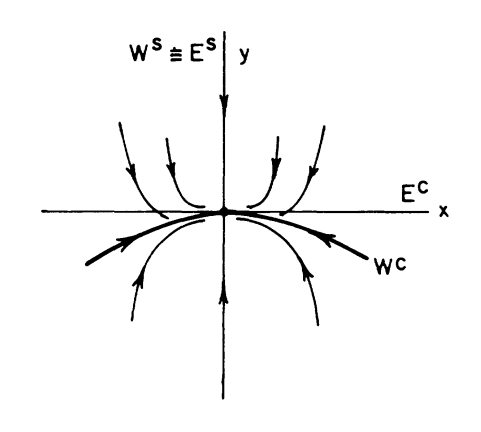

## III. Codimension 1 bifurcations of equilibria

* Suppose $f(x, \mu)$ is a one-parameter family of vector fields (with $\mu \in \mathbb{R}$ and $x \in \mathbb{R}^n$). _Bifurcation theory_ is concerned with characterizing the kinds of geometric transitions that can occur in the phase portrait of the system $\dot{x} = f(x, \mu)$ as one varies the parameter $\mu$.

* Assume $f$ has a hyperbolic equilibrium at $p^{\ast}$ for $\mu = \mu^{\ast}$. Then note that:
    * By the implicit function theorem, the equilibrium perturbs smoothly to $p^{\ast} (\mu)$ for $\mu$ in some neighborhood $I \ni \mu^{\ast}$.
    * By continuity of eigenvalues, $p^{\ast}(\mu)$ is hyperbolic for all $\mu \in I$ (possibly after shrinking $I$).
    * The dimensions $\dim(E^{k}_{p^{\ast}(\mu)})$ for $k = s, u, c$ remain constant as $\mu$ varies in $I$ (again by continuity of eigenvalues).
    * Thus, by Hartman-Grobman, (the topological equivalence class of) the local phase portrait does not change when varying $\mu$ in $I$.
    
* The important consequence is that changes in the phase portrait at some parameter value must be accompanied by a concomitant **loss of hyperbolicity**.
    


* Generically, there are only two ways to lose hyperbolicity in a one-parameter family:
    * a single real eigenvalue associated with some equilibrium passes through zero, or
    * a single pair of complex conjugate eigenvalues associated with some equilibrium pass through the imaginary axis.


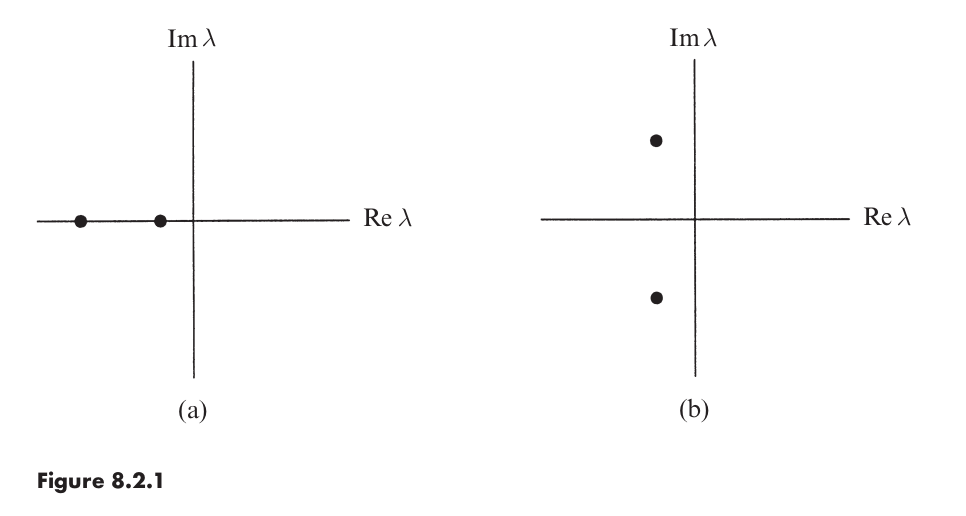


* The associated bifurcations are the **saddle-node** and **Hopf** bifurcation, respectively (note that other one-parameter bifurcations do exist, but are nongeneric in the sense that arbitrarily small perturbations of the family of ODEs will always revert to one the two named cases; thus, the other bifurcations only arise in families exhibiting exceptional symmetries).

### Saddle-node bifurcation

Consider the family of vector fields on $\mathbb{R}$ given by $$f(x, \mu) = \mu - x^2$$ For $\mu > 0$, there are two equilibria at $x = \pm \sqrt{\mu}$; the positive equilibrium is attracting and the negative equilibrium is repelling. As $\mu \to 0^{+}$, the two equilibria collide and annihilate one another, resulting in no equilibria for $\mu < 0$. Note that $f_x (\sqrt{\mu}, \mu) = -2\sqrt{\mu}$, so indeed we have a real eigenvalue passing through zero.

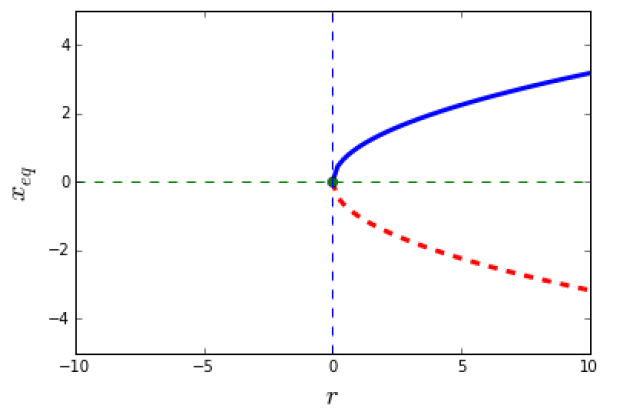



Under appropriate nondegeneracy conditions, one can show that it is precisely this behavior that occurs when a real eigenvalue passes through zero; in other words, the above equation is a "universal" model for the bifurcation (which is then characterized by the precise nondegeneracy conditions).

We will prove this for the one-dimensional case, although it is also true in higher dimensions.



**Theorem (Saddle-node bifurcation):** Let $f(x, \mu)$ be a smooth one-parameter family of vector fields on $\mathbb{R}$. Assume there exists $(p^{\star}, \mu^{\star}) \in \mathbb{R} \times \mathbb{R}$ such that $$f(p^{\star}, \mu^{\star}) = 0$$ $$f_{x} (p^{\star}, \mu^{\star}) = 0$$ Moreover, assume the following generic conditions are fulfilled: $$f_{xx} (p^{\star}, \mu^{\star}) \neq 0$$ $$f_{\mu} (p^{\star}, \mu^{\star}) \neq 0$$
Then there is a neighborhood of $(p^{\star}, \mu^{\star})$ for which the phase portrait of the system $$\dot{x} = f(x, \mu)$$ $$\dot{\mu} = 0$$ is equivalent to that of $$\dot{x} = \mu - x^2$$ $$\dot{\mu} = 0$$ near $(0,0)$.


_Proof_: W.l.o.g. $(p^{\star}, \mu^{\star}) = (0,0)$. Since $f_{\mu} (0,0)\neq 0$, by implicit function theorem we can find $\mu(x)$ defined in a neighborhood of $x = 0$ such that $f(x, \mu(x)) = 0$. Now compute $$0 = \frac{d}{dx} f(x, \mu(x)) =  f_{x} (x, \mu(x)) + f_{\mu} (x, \mu(x)) \mu'(x)  \implies \mu'(0) = 0$$ $$0 = \frac{d^2}{dx^2} f(x, \mu(x)) = f_{xx} (x, \mu(x)) + 2f_{\mu x} (x, \mu(x)) \mu'(x) + f_{\mu \mu} (x, \mu(x)) \mu''(x) \implies \mu''(x) \neq 0$$ It follows that the graph of $\mu$ is shaped as a parabola near $x = 0$, and therefore there is some neighborhood in which each value of $\mu$ is attained exactly twice. This proves that the curve of equilibria has the same qualitative shape as our model for the saddle-node bifurcation; it remains to construct the equivalence, which can be done directly by matching up equilibria. $\blacksquare$

### Hopf bifurcation

Consider the family of planar linear systems given by $$\dot{x} = \mu x - y$$ $$\dot{y} = x$$ The Jacobian at $(0,0)$ is $$\begin{pmatrix} \mu & -1 \\ 1 & 0 \end{pmatrix}$$ and one can easily compute that $\text{Re}(\lambda) = \mu/2$ for eigenvalues $\lambda, \overline{\lambda}$ of the matrix (assuming $|\mu|<2$). Thus, as $\mu$ passes through zero from below, the equilibrium at the origin loses stability. But at $\mu = 0$, we have a more special situation: the plane is filled with bounded integral curves (in this case, circles). This situation is _not_ quite a Hopf bifurcation; we can instead think of the Hopf bifurcation as a nonlinear "deformation" of this picture.

Generically, the sheet of periodic orbits occurring at $\mu = 0$ will not be restricted to a single parameter value. Rather, it will be bent such that each parameter value has exactly one periodic orbit, and it is this situation that is stable to small perturbation.

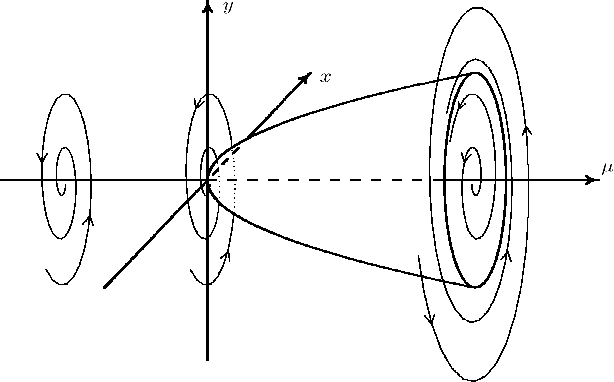

Again, we will state the Hopf bifurcation theorem in the two-dimensional case, but the higher dimensional analogue is also true.

**Theorem (Hopf bifurcation):** Let $f(x, \mu)$ be a smooth one-parameter family of planar vector fields with $(x, \mu) \in \mathbb{R}^2 \times \mathbb{R}$. Assume there exists an equilibrium $(p^{\star}, \mu^{\star})$ with eigenvalues on the imaginary axis. In this case, by implicit function theorem, the equilibrium continues to $p(\mu)$ for $\mu$ in a neighborhood of $\mu^{\star}$, with associated eigenvalue $\lambda(\mu)$. We have two required nondegeneracy conditions:
* $$\frac{d}{d\mu} \text{Re}(\lambda(\mu)) \neq 0$$ (the eigenvalues move through the imaginary axis with nonzero speed)
* $\ell \neq 0$ where $\ell$ is a quantity with an explicitly computable formula that I do not dare to repeat here (first Lyapunov coefficient)

If the nondegeneracy conditions are satisfied, then we are in the situation:

"For $\mu x \mu^{\star}$, $p(\mu)$ is a $y$ equilibrium, and for $\mu !x \mu^{\star}$, the system has a $y$ periodic orbit and $p(\mu)$ is now $!y$"

for some choices $x \in \{ <, >\}$ and $y \in \{\text{stable}, \text{unstable}\}$, where $!$ denotes the opposite choice in the set.

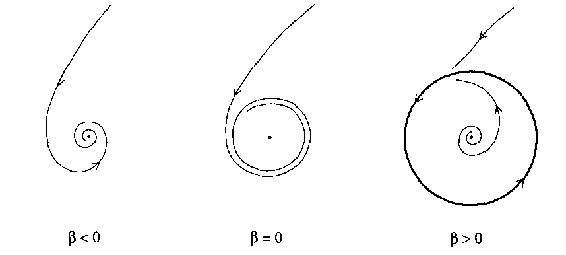

**Lemma (Hopf bifurcation scaling):** Any Hopf bifurcation exhibits characteristic scaling behavior. Namely, for $\mu$ sufficiently close to $\mu^{\star}$, the amplitude of the periodic orbit scales like $\sqrt{|\mu - \mu^{\star}|}$. Moreover, as $\mu \to \mu^{\star}$, the period of the oscillation approaches $2\pi/\omega$ where $\omega = \text{Im}(\lambda(\mu^{\star}))$.

## IV. Introduction: the van der Pol oscillator

The paradigmatic example of a multiple timescale dynamical system is the **van der Pol oscillator**; this is a planar system with evolution given by $$\dot{x} = x - \frac{x^3}{3} + y $$ $$\dot{y} = \epsilon(a-x)$$ where $a$ and $0< \epsilon \ll 1$ are constants. Presence of the small parameter $\epsilon$ ensures that $y$ changes much more slowly than $x$, so we call them the _slow variable_ and _fast variable_, respectively.

Note that the system has a unique equilibrium at $p := (a, a^3/3 - a)$ with Jacobian $$\begin{pmatrix} 1-x^2 & 1 \\ -\epsilon & 0 \end{pmatrix} \Big\vert_{p} = \begin{pmatrix} 1-a^2 & 1 \\ -\epsilon & 0 \end{pmatrix}$$ with eigenvalues $$\lambda = \frac{1-a^2 \pm \sqrt{(a^2 - 1)^2 - 4\epsilon}}{2}$$ In particular, observe that the eigenvalues are pure imaginary at $a = 1$, suggesting a Hopf bifurcation takes place here (and in fact it does). Thus, we should expect oscillatory behavior for a certain range of parameter values.


For the time being, let's just consider the case $a = 0.3$. Here, we have large amplitude oscillations alternating between two distinct phases:

* When $\dot{x} \neq 0$ is bounded away from zero, for $0<\epsilon \ll 1$, we expect $0 < \dot{y}/\dot{x} \ll 1$, so that the trajectory moves fast and nearly parallel to the $x$-axis.
* When $\dot{x} \approx 0$, the trajectory is "caught" by the cubic $y = x^3/3 - x$ corresponding to $\dot{x} = 0$ and the motion in the $y$ direction, although very slow, dominates. During this phase, the trajectory hugs the cubic until reaching a fold, at which point another fast jump takes place.

The alternation between these two phases, in combination with the _return mechanism_ produced by the shape of the cubic, generates **relaxation oscillations**. These are very different from nearly linear/sinusoidal oscillations we expect to emerge from a Hopf bifurcation, but more qualitatively analogous to certain oscillations observed in nature (e.g. neuronal spiking, heartbeats).

We can understand these two phases of the oscillation as corresponding to two distinct limiting behaviors as $\epsilon \to 0$, and we will begin tomorrow by elaborating on this statement.

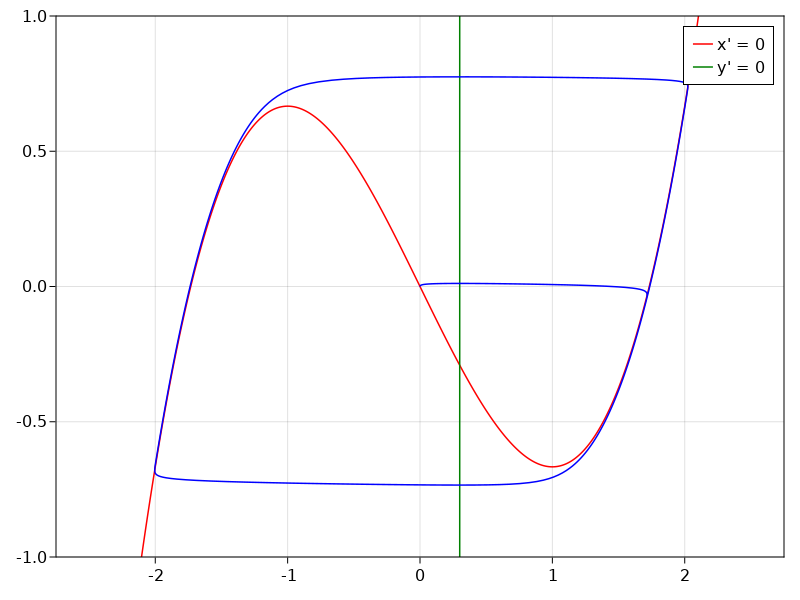

In [27]:
u0 = zeros(2)
tspan = (0.0,500.0)
p = (1e-2,.3)
fig,sol = vdpplot(u0,tspan,p)
fig